<a href="https://colab.research.google.com/github/Sunnykumar926/LocalRepo/blob/main/color_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [6]:
image = imread("/content/drive/MyDrive/Ladybug.jpeg")
image.shape

(480, 640, 3)

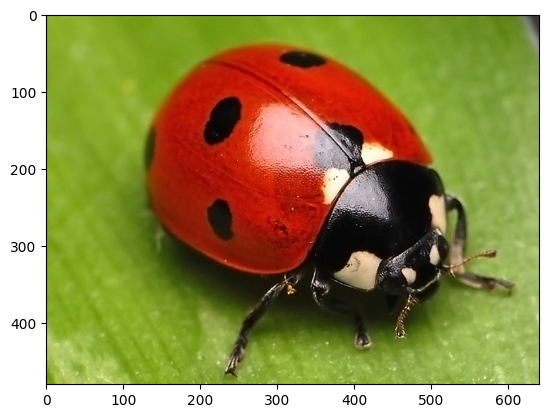

In [ ]:
plt.imshow(image)

In [ ]:
X = image.reshape(-1, 3)

In [ ]:
X.shape

(307200, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4).fit(X)

In [ ]:
kmeans.cluster_centers_

array([[194.66996471, 184.08624174, 131.44713583],
       [131.37529763, 161.40317864,  48.42964757],
       [ 36.69732211,  34.77837848,  13.79164155],
       [174.16669477,  31.77559815,   8.76364454]])

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Assign each pixel in the segmented image its corresponding cluster center
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image


array([[131.37529763, 161.40317864,  48.42964757],
       [131.37529763, 161.40317864,  48.42964757],
       [131.37529763, 161.40317864,  48.42964757],
       ...,
       [194.66996471, 184.08624174, 131.44713583],
       [194.66996471, 184.08624174, 131.44713583],
       [194.66996471, 184.08624174, 131.44713583]])

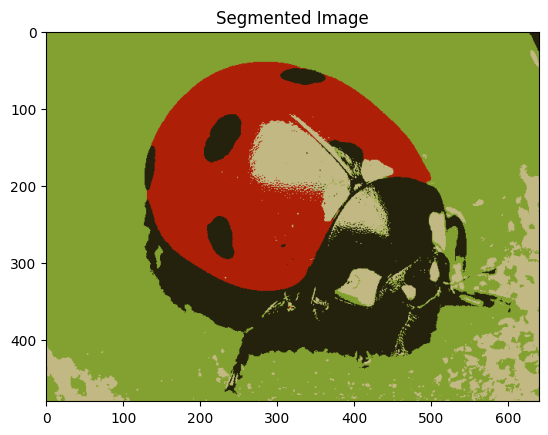

In [ ]:
segmented_image = segmented_image.reshape(image.shape)

# Normalize the segmented image to the range [0, 1]
segmented_image = np.clip(segmented_image, 0, 255) / 255.0

# Display the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()

In [ ]:
kmeans.inertia_

412694330.4314387

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6122038480160202